In [7]:
from google.colab import files
uploaded = files.upload()


Saving HousePriceDataset.csv to HousePriceDataset.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')


In [8]:
df = pd.read_csv('HousePriceDataset.csv')
df.head()


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [11]:
print(df.columns.tolist())


['id', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price']


In [13]:
# Load the dataset (make sure you've uploaded it)
df = pd.read_csv('HousePriceDataset.csv')
print("Dataset loaded successfully ✅")

# Convert 'number of bedrooms' to integer
df['number of bedrooms'] = df['number of bedrooms'].astype(int)

# Check for missing values and handle them
print("Missing values before handling:\n", df.isnull().sum())
df.fillna(df.mean(), inplace=True)

# Drop unnecessary columns
df.drop(['Postal Code', 'Lattitude', 'Longitude'], axis=1, inplace=True)

# Separate features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Output shapes
print("Preprocessing complete ✅")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Dataset loaded successfully ✅
Missing values before handling:
 id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport         

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))  # Since we are predicting house price (a regression task)
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)

# Print the loss
print(f"Test Loss: {loss:.4f}")



92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 439970856960.0000
Test Loss: 436339965952.0000


In [19]:
# Train the model and save the history
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/25
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 45315039232.0000 - val_loss: 39073046528.0000
Epoch 2/25
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 39097876480.0000 - val_loss: 37751848960.0000
Epoch 3/25
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 38605000704.0000 - val_loss: 36523999232.0000
Epoch 4/25
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 37061042176.0000 - val_loss: 35422904320.0000
Epoch 5/25
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40490319872.0000 - val_loss: 34414084096.0000
Epoch 6/25
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35599736832.0000 - val_loss: 33484251136.0000
Epoch 7/25
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32130617344.0000 - val_loss: 32657078272.0000
Epoch 8/25
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 32176547840.0000 - val_loss: 31917631488.0000
Epoch 9/25
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 38337085440.0000 - val_loss: 31264212992.0000
Epoch 10/25
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

KeyError: 'mae'

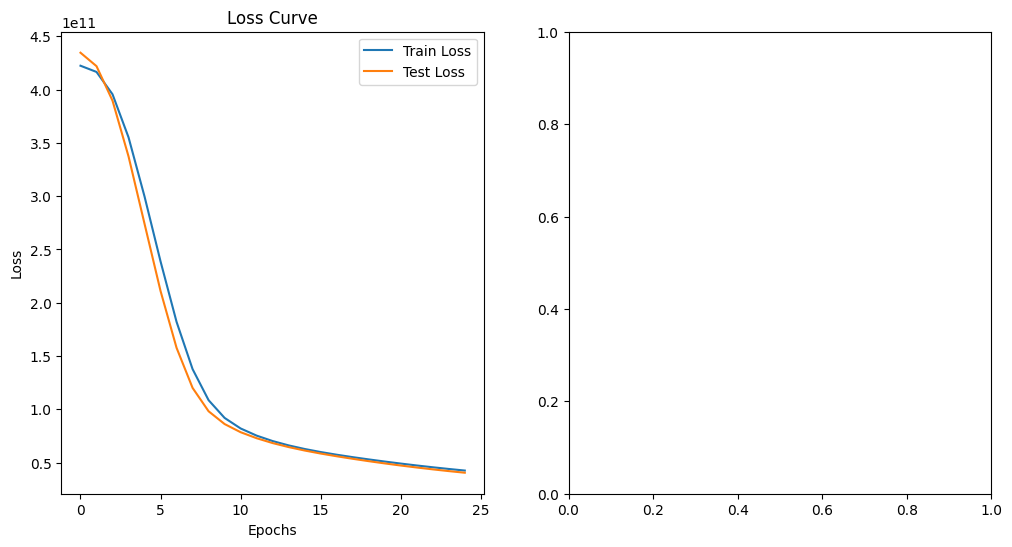

In [18]:
import matplotlib.pyplot as plt

# Plot the Loss Curve
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.title('MAE Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
